# Load data

In [63]:
import pandas as pd

In [64]:
from pathlib import Path

def load_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(Path(path))
    return data

In [65]:
data = load_data("../data/data.csv")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Preprocessing

In [67]:
from warnings import filterwarnings
filterwarnings("ignore")

In [68]:
from sentence_transformers import SentenceTransformer

# intfloat/e5-small-v2 or intfloat/e5-base-v2 or intfloat/e5-large-v2
model = SentenceTransformer("intfloat/e5-small-v2")

In [69]:
embeddings = model.encode(data['text'], normalize_embeddings=True, show_progress_bar=True)

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

In [70]:
nb_comp = len(embeddings[0])
nb_data = len(embeddings)
print(f"embedding size : {nb_comp}")

embedding size : 384


In [71]:
for num_comp in range(nb_comp):
    data['x_' + str(num_comp)] = [embeddings[k][num_comp] for k in range(nb_data)]

In [72]:
data.head(10)

,id,keyword,location,text,target,x_0,x_1,x_2,x_3,x_4,...,x_374,x_375,x_376,x_377,x_378,x_379,x_380,x_381,x_382,x_383
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,-0.085014,0.037619,0.043141,-0.013582,-0.039502,...,-0.015111,-0.091739,-0.006207,-0.065880,0.001195,0.028524,0.041490,0.022493,-0.052284,0.005658
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,-0.007675,0.052327,0.060509,0.003969,0.033272,...,-0.004134,-0.068609,-0.015161,-0.026652,-0.062071,-0.040363,-0.057321,0.003138,-0.054532,0.047691
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,-0.032239,0.059961,0.045192,-0.004393,-0.003297,...,-0.055649,-0.042831,0.021676,-0.023298,-0.012054,0.014243,-0.049301,0.052759,-0.047772,0.034149
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,-0.045641,0.017100,0.038876,-0.006642,-0.008925,...,0.007952,-0.084324,0.016554,-0.052065,-0.057295,0.017911,-0.006158,-0.018141,-0.032954,0.009808
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,-0.035520,0.023880,0.044553,0.024645,-0.000059,...,-0.024434,-0.097317,0.006670,-0.035037,-0.043080,-0.027862,0.004018,-0.050536,-0.073364,0.069326
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,-0.034064,-0.001821,0.053018,0.038222,-0.012096,...,-0.044370,-0.057694,-0.004118,-0.031918,-0.037772,0.052436,-0.031906,0.012246,-0.025401,0.045207
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,-0.036942,-0.012863,0.085812,-0.013935,-0.015450,...,0.010090,-0.045445,-0.034210,-0.087197,-0.047171,0.037995,-0.029361,0.006457,-0.057557,0.069720
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,-0.041601,0.047579,0.013826,0.035744,0.008781,...,-0.032012,-0.089170,0.002411,-0.007012,-0.057068,-0.010832,-0.025377,-0.049970,-0.083295,0.045461
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,-0.040598,0.047852,0.008994,0.028989,0.036357,...,-0.018108,-0.082590,-0.037508,-0.073241,-0.060317,-0.015639,-0.084439,0.021132,-0.043704,0.068749
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,-0.044897,0.001604,0.048791,0.029758,0.009474,...,0.031036,-0.060854,-0.041778,-0.071841,-0.059915,0.009748,-0.035506,0.031135,-0.091282,0.070937


In [73]:
data_keywords = data['keyword']

In [74]:
data_keywords.size

7613

In [75]:
data_keywords.value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [76]:
columns = ['keyword']
data_dummy = pd.get_dummies(data, columns=columns, drop_first=True)
data_dummy.replace({False: 0, True: 1}, inplace=True)

In [77]:
data_dummy.head(10)

,id,location,text,target,x_0,x_1,x_2,x_3,x_4,x_5,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,-0.085014,0.037619,0.043141,-0.013582,-0.039502,0.030180,...,0,0,0,0,0,0,0,0,0,0
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,-0.007675,0.052327,0.060509,0.003969,0.033272,0.049459,...,0,0,0,0,0,0,0,0,0,0
2,5,NaN,All residents asked to 'shelter in place' are ...,1,-0.032239,0.059961,0.045192,-0.004393,-0.003297,0.037312,...,0,0,0,0,0,0,0,0,0,0
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,-0.045641,0.017100,0.038876,-0.006642,-0.008925,0.028679,...,0,0,0,0,0,0,0,0,0,0
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,-0.035520,0.023880,0.044553,0.024645,-0.000059,0.047627,...,0,0,0,0,0,0,0,0,0,0
5,8,NaN,#RockyFire Update => California Hwy. 20 closed...,1,-0.034064,-0.001821,0.053018,0.038222,-0.012096,0.036847,...,0,0,0,0,0,0,0,0,0,0
6,10,NaN,#flood #disaster Heavy rain causes flash flood...,1,-0.036942,-0.012863,0.085812,-0.013935,-0.015450,-0.018039,...,0,0,0,0,0,0,0,0,0,0
7,13,NaN,I'm on top of the hill and I can see a fire in...,1,-0.041601,0.047579,0.013826,0.035744,0.008781,0.046970,...,0,0,0,0,0,0,0,0,0,0
8,14,NaN,There's an emergency evacuation happening now ...,1,-0.040598,0.047852,0.008994,0.028989,0.036357,0.037854,...,0,0,0,0,0,0,0,0,0,0
9,15,NaN,I'm afraid that the tornado is coming to our a...,1,-0.044897,0.001604,0.048791,0.029758,0.009474,0.038861,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Columns: 608 entries, id to keyword_wrecked
dtypes: float32(384), int64(222), object(2)
memory usage: 24.2+ MB


In [79]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")
data_dummy_wNan = data_dummy.dropna()

def get_coordinates(location):
    try:
        location = geolocator.geocode(location)
        return location.latitude, location.longitude
    except:
        return None

data_tmp = data_dummy_wNan.head(10)
for location in data_tmp['location']:
    print(location, get_coordinates(location))
# data_tmp['coordinates'] = data1['location'].apply(get_coordinates)


Birmingham None
Est. September 2012 - Bristol None
AFRICA (11.5024338, 17.7578122)
Philadelphia, PA (39.9527237, -75.1635262)
London, UK (51.5074456, -0.1277653)
Pretoria (-25.7459277, 28.1879101)
World Wide!! (28.3376729, -81.55752250357412)
Paranaque City (14.4573274, 121.03323686843908)
Live On Webcam None
milky way (-7.1280388, 52.7448393)


In [ ]:
# data_dummy_wNan.apply(lambda x: get_coordinates(x['location']), axis=1)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# data_dummy_wNan = data_dummy.dropna()
# corr = data_dummy_wNan.corr()
# sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)


# Spliting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# FIXME : use location
input = data_dummy.drop(columns=['text', 'target', 'location'])
output = data_dummy['target']

In [ ]:
input.head(5)

,id,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,0.011803,-0.031025,0.034121,-0.020263,-0.009868,0.036456,-0.068728,-0.024695,-0.035514,...,0,0,0,0,0,0,0,0,0,0
1,4,0.011739,-0.013322,0.018322,0.001877,-0.020319,0.014953,-0.025803,-0.032525,-0.021376,...,0,0,0,0,0,0,0,0,0,0
2,5,0.016125,-0.040696,0.013457,-0.034184,-0.030858,0.009321,-0.038354,-0.026488,-0.011080,...,0,0,0,0,0,0,0,0,0,0
3,6,0.027257,-0.038108,0.032964,-0.001223,-0.010603,0.026744,-0.033315,-0.001060,-0.029681,...,0,0,0,0,0,0,0,0,0,0
4,7,0.024751,-0.048040,0.021240,-0.013732,-0.037089,0.047018,-0.022738,-0.011316,0.008642,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=42)

# Training

## K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
clf.fit(input_train, output_train)
print(f"train accuracy : {clf.score(input_train, output_train)}")
print(f"test accuracy : {clf.score(input_test, output_test)}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


train accuracy : 0.7889983579638752
test accuracy : 0.6789231779382797


In [ ]:
grid_neighborns = [k for k in range(10, 40)]

In [ ]:
from tqdm import tqdm

training_accuracy = []
test_accuracy = []

for n_neighbors in tqdm(grid_neighborns):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(input_train, output_train)
    training_accuracy.append(clf.score(input_train, output_train))
    test_accuracy.append(clf.score(input_test, output_test))

100%|██████████| 19/19 [00:26<00:00,  1.37s/it]


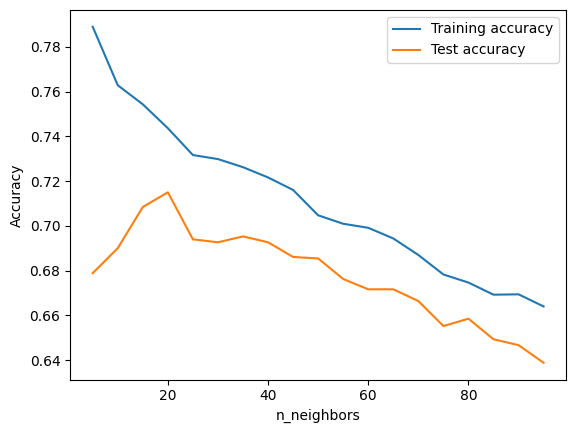

In [ ]:
import matplotlib.pyplot as plt

plt.plot(grid_neighborns, training_accuracy, label="Training accuracy")
plt.plot(grid_neighborns, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
grid_neighborns = {'n_neighbors' : [k for k in range(20, 40, 1)]}


In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), grid_neighborns, cv=10, n_jobs=-1)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid_search.fit(input_train, output_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95]})

In [ ]:
print("Train set score: {:.2f}".format(grid_search.score(input_train, output_train)))
print("Test set score: {:.2f}".format(grid_search.score(input_test, output_test)))

Train set score: 0.75
Test set score: 0.71


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.71


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(input_train, output_train)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(input_train, output_train)))
print("Test set score: {:.2f}".format(lr.score(input_test, output_test)))

Training set score: 0.61
Test set score: 0.40


## Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
grid_alpha = {
    'alpha' : [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'max_iter' : [10, 100, 1000, 10000, 100000]
}

In [ ]:
grid_search = GridSearchCV(Ridge(), grid_alpha, cv=10, n_jobs=-1)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid_search.fit(input_train, output_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [10, 100, 1000, 10000, 100000]})

In [ ]:
print("Train set score: {:.2f}".format(grid_search.score(input_train, output_train)))
print("Test set score: {:.2f}".format(grid_search.score(input_test, output_test)))

Train set score: 0.56
Test set score: 0.47


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1, 'max_iter': 10}
Best cross-validation score: 0.46


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
grid = {
    'alpha' : [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'max_iter' : [10, 100, 1000, 10000, 100000]
}

In [ ]:
grid_search = GridSearchCV(Lasso(), grid, cv=10, n_jobs=-1)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
grid_search.fit(input_train, output_train)

/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.831e+02, tolerance: 1.343e-01
  model = cd_fast.enet_coordinate_descent(
/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.860e+02, tolerance: 1.341e-01
  model = cd_fast.enet_coordinate_descent(
/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [10, 100, 1000, 10000, 100000]})

In [ ]:
print("Training set score: {:.2f}".format(grid_search.score(input_train, output_train)))
print("Test set score: {:.2f}".format(grid_search.score(input_test, output_test)))

Training set score: 0.31
Test set score: 0.29


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001, 'max_iter': 100}
Best cross-validation score: 0.29


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'solver' : ['liblinear'],
    'max_iter' : [10, 100, 1000, 10000, 100000]
}

In [ ]:
grid_search = GridSearchCV(LogisticRegression(), grid, cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(input_train, output_train)

/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/celien/miniconda3/envs/ml_project_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'max_iter': [10, 100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [ ]:
print("Training set score: {:.3f}".format(grid_search.score(input_train, output_train)))
print("Test set score: {:.3f}".format(grid_search.score(input_test, output_test)))

Training set score: 0.849
Test set score: 0.827


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.82


In [ ]:
best_C = 1
best_max_iter = 100
best_penalty = 'l1'
best_solver = 'liblinear'

In [ ]:
LogReg = LogisticRegression(C=best_C, max_iter=best_max_iter, penalty=best_penalty, solver=best_solver).fit(input_train, output_train)

In [ ]:
print("Training set score: {:.3f}".format(LogReg.score(input_train, output_train)))
print("Test set score: {:.3f}".format(LogReg.score(input_test, output_test)))

Training set score: 0.847
Test set score: 0.827
